In [ ]:
!nvidia-smi

Wed Feb  5 01:09:37 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   54C    P8             13W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
from google.colab import drive
from google.colab import userdata

drive.mount('/content/drive')

Mounted at /content/drive


#Setting up

In [ ]:
# # If the files/folders already exist in your Drive, run this script to bind them to other location as references
# # instead of re-downloading and unzipping them each time the notebook runs.
# """
%%bash
for item in "/content/drive/MyDrive/Colab Notebooks/Grounded Language Processing [146078]/Projects/DATA/image_dailylife/"*; do
    ln -s "$item" /content/
done
# """

In [ ]:
%cd "/content/"

/content


In [ ]:
# Put your path
# !unzip "/content/drive/MyDrive/Anotações/Codes Google Colab/image_dailylife.zip"

In [ ]:
import os
import shutil

images_list = os.listdir("/content/image")

# Removing non file elements
for image in images_list:
    non_image_path = os.path.join("/content/image", image)
    if os.path.isdir(non_image_path):
        shutil.rmtree(non_image_path)

clean_images_list = sorted(os.listdir("/content/image"))[:100]

# Creating the dataset with the first sorted 100 images

os.makedirs("/content/images_dataset", exist_ok=True)

for image in clean_images_list:
    shutil.copy(os.path.join("/content/image", image), os.path.join("/content/images_dataset", image))

len(os.listdir("/content/image")), len(os.listdir("/content/images_dataset"))

(454, 100)

In [ ]:
IMAGES_DESCRIPTION_PATH = "/content/images_description/"

# INCORRECT_OBJECT_PATH = "" # replace it with your path
# INCORRECT_OBJECT_PATH = "/content/drive/MyDrive/Anotações/Codes Google Colab/incorrect_object_action_list.xlsx"
INCORRECT_OBJECT_PATH = "/content/drive/MyDrive/Colab Notebooks/Grounded Language Processing [146078]/Projects/incorrect_object_action_list.xlsx"


os.makedirs(IMAGES_DESCRIPTION_PATH, exist_ok=True)
os.makedirs(IMAGES_DESCRIPTION_PATH + "llava_halc", exist_ok=True)
os.makedirs(IMAGES_DESCRIPTION_PATH + "llava_halc_incorrect_prompt", exist_ok=True)

#Setting the HALC

## Init HALC, Setting Up DINO, Fixing Bug in HALC

In [ ]:
%cd "/content/"

/content


In [ ]:
!git clone https://github.com/BillChan226/HALC.git

Cloning into 'HALC'...
remote: Enumerating objects: 14094, done.
remote: Counting objects: 100% (477/477), done.
remote: Compressing objects: 100% (274/274), done.
remote: Total 14094 (delta 263), reused 359 (delta 175), pack-reused 13617 (from 1)
Receiving objects: 100% (14094/14094), 269.94 MiB | 16.79 MiB/s, done.
Resolving deltas: 100% (7470/7470), done.
Updating files: 100% (5112/5112), done.


In [ ]:
%cd "/content/HALC/decoder_zoo/GroundingDINO/"
!pip install -r requirements.txt -q

/content/HALC/decoder_zoo/GroundingDINO
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 21.0 MB/s eta 0:00:00


if there is a problem with this error massege:
```
ms_deform_attn_cuda.cu", static_cast<uint32_t>(135), (::c10::detail::torchCheckMsgImpl( "Expected " "false" " to be true, but got false.  " "(Could this error message be improved?  If so, " "please report an enhancement request to PyTorch.)", "dtype '", toString(at::ScalarType::Float), "' not selected for kernel tag ", at_dispatch_name))); }; } } while (0); using scalar_t [[maybe_unused]] = c10::impl::ScalarTypeToCPPTypeT<at::ScalarType::Float>; return ([&] { ms_deformable_col2im_cuda(at::cuda::getCurrentCUDAStream(), grad_output_g.data<scalar_t>(), value.data<scalar_t>() + n * im2col_step_ * per_value_size, spatial_shapes.data<int64_t>(), level_start_index.data<int64_t>(), sampling_loc.data<scalar_t>() + n * im2col_step_ * per_sample_loc_size, attn_weight.data<scalar_t>() + n * im2col_step_ * per_attn_weight_size, batch_n, spatial_size, num_heads, channels, num_levels, num_query, num_point, grad_value.data<scalar_t>() + n * im2col_step_ * per_value_size, grad_sampling_loc.data<scalar_t>() + n * im2col_step_ * per_sample_loc_size, grad_attn_weight.data<scalar_t>() + n * im2col_step_ * per_attn_weight_size); })(); } default: if (!(false)) { ::c10::detail::torchCheckFail( __func__, "/home/disi/hallucinations-in-mementos-image-sequences/combined/HALC/decoder_zoo/GroundingDINO/groundingdino/models/GroundingDINO/csrc/MsDeformAttn/ms_deform_attn_cuda.cu", static_cast<uint32_t>(135), (::c10::detail::torchCheckMsgImpl( "Expected " "false" " to be true, but got false.  " "(Could this error message be improved?  If so, " "please report an enhancement request to PyTorch.)", '"', at_dispatch_name, "\" not implemented for '", toString(_st), "'"))); }; } }()
                                                                                                                                                                             ^
    
    2 errors detected in the compilation of "/home/disi/hallucinations-in-mementos-image-sequences/combined/HALC/decoder_zoo/GroundingDINO/groundingdino/models/GroundingDINO/csrc/MsDeformAttn/ms_deform_attn_cuda.cu".
    error: command '/usr/local/cuda/bin/nvcc' failed with exit code 2
    [end of output]

note: This error originates from a subprocess, and is likely not a problem with pip.

[notice] A new release of pip is available: 23.0.1 -> 25.0
[notice] To update, run: pip install --upgrade pip

```

Do these:
1. Ensure the versions are aligned
```
python -c "import torch; print(torch.__version__); print(torch.version.cuda)"
nvcc --version
nvidia-smi
```

2. Change the `ms_deform_attn_cuda.cu` <br>
It can happened because of the deprecated PyTorch API usage in the CUDA extension for MsDeformAttn. The error is caused by value.type(), which was removed in PyTorch 2.1+. (from chatGPT) <br>

From this
```
AT_ASSERTM(value.type().is_cuda(), "value must be a CUDA tensor");
AT_ASSERTM(spatial_shapes.type().is_cuda(), "spatial_shapes must be a CUDA tensor");
AT_ASSERTM(level_start_index.type().is_cuda(), "level_start_index must be a CUDA tensor");
AT_ASSERTM(sampling_loc.type().is_cuda(), "sampling_loc must be a CUDA tensor");
AT_ASSERTM(attn_weight.type().is_cuda(), "attn_weight must be a CUDA tensor");
```

To this
```
AT_ASSERTM(value.is_cuda(), "value must be a CUDA tensor");
AT_ASSERTM(spatial_shapes.is_cuda(), "spatial_shapes must be a CUDA tensor");
AT_ASSERTM(level_start_index.is_cuda(), "level_start_index must be a CUDA tensor");
AT_ASSERTM(sampling_loc.is_cuda(), "sampling_loc must be a CUDA tensor");
AT_ASSERTM(attn_weight.is_cuda(), "attn_weight must be a CUDA tensor");
```

From this
```
AT_DISPATCH_FLOATING_TYPES(value.type(), "ms_deform_attn_forward_cuda", ([&] {
```

To this
```
AT_DISPATCH_FLOATING_TYPES(value.scalar_type(), "ms_deform_attn_forward_cuda", ([&] {
```

From this
```
AT_DISPATCH_FLOATING_TYPES(value.type(), "ms_deform_attn_backward_cuda", ([&] {
```

To this
```
AT_DISPATCH_FLOATING_TYPES(value.scalar_type(), "ms_deform_attn_backward_cuda", ([&] {

```



In [ ]:
!pip install "/content/HALC/decoder_zoo/GroundingDINO/" -q

  Preparing metadata (setup.py) ... done


In [ ]:
# %cd ../..
# %mkdir model_checkpoints
# %cd model_checkpoints
%mkdir "weights/"
%cd "weights"
!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

/content/HALC/decoder_zoo/GroundingDINO/weights


In [ ]:
%cd "/content/"

/content


due to this error, I will edit the code in `/content/HALC/minigpt4/models/llava.py`

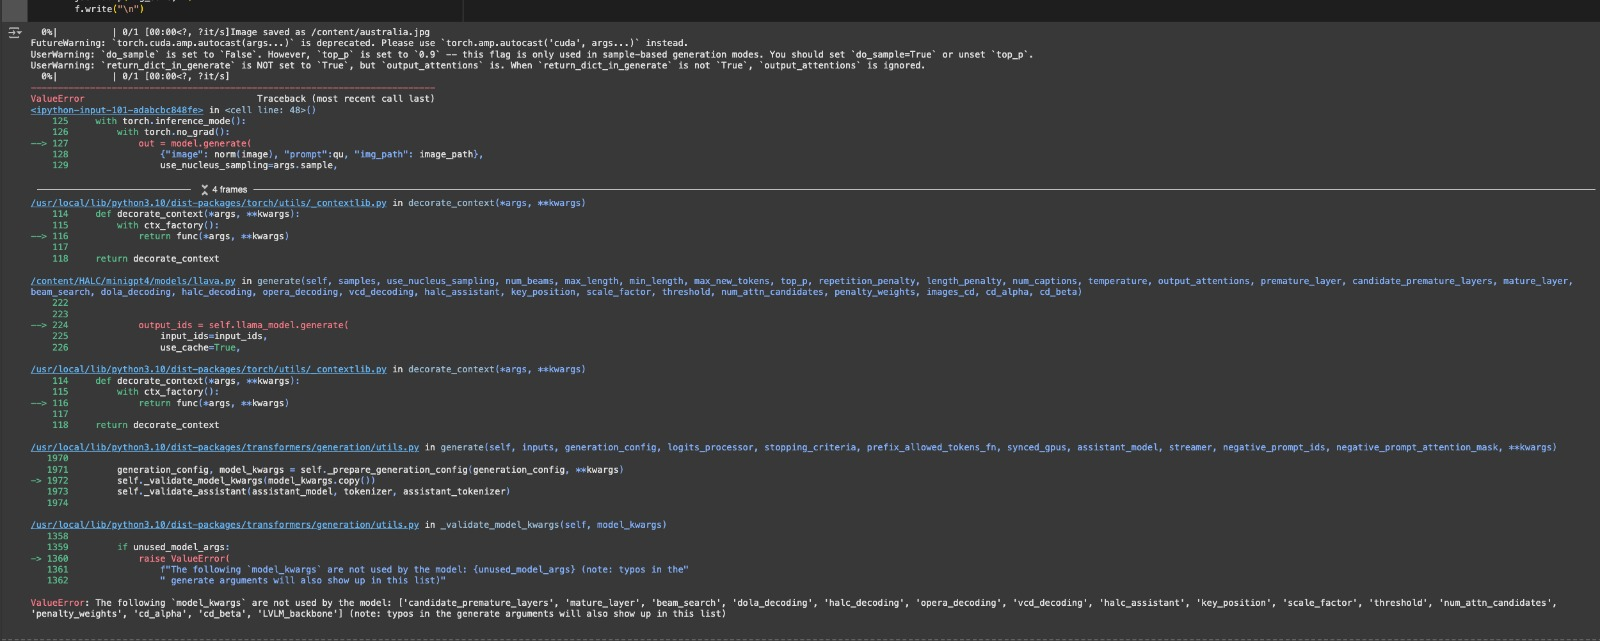

In [ ]:
with open("/content/HALC/minigpt4/models/llava.py") as f:
  lines = f.readlines()

In [ ]:
"""
ValueError: The following `model_kwargs` are not used by the model:
['candidate_premature_layers', 'mature_layer', 'beam_search', 'dola_decoding',
'halc_decoding', 'opera_decoding', 'vcd_decoding', 'halc_assistant', 'key_position',
'scale_factor', 'threshold', 'num_attn_candidates', 'penalty_weights', 'cd_alpha', 'cd_beta',
'LVLM_backbone'] (note: typos in the generate arguments will also show up in this list)
"""
lines[241] = "#                candidate_premature_layers=candidate_premature_layers,\n"
lines[242] = "#                mature_layer=mature_layer,\n"
lines[243] = "#                beam_search=beam_search,\n"
lines[244] = "#                dola_decoding=dola_decoding,\n"
lines[245] = "#                halc_decoding=halc_decoding,\n"
lines[246] = "#                opera_decoding=opera_decoding,\n"
lines[247] = "#                vcd_decoding=vcd_decoding,\n"
lines[248] = "#                halc_assistant=halc_assistant,\n"
lines[250] = "#                key_position=key_position,\n"
lines[251] = "#                scale_factor=scale_factor,\n"
lines[252] = "#                threshold=threshold,\n"
lines[253] = "#                num_attn_candidates=num_attn_candidates,\n"
lines[254] = "#                penalty_weights=penalty_weights,\n"
lines[257] = "#                cd_alpha=cd_alpha,\n"
lines[258] = "#                cd_beta=cd_beta,\n"
lines[259] = "#                LVLM_backbone=self,\n"
with open("/content/HALC/minigpt4/models/llava.py", "w") as f:
  f.writelines(lines)

change the yaml file based on the instruction on the readme

In [ ]:
# based on https://github.com/BillChan226/HALC/tree/OH_zoo
with open("/content/HALC/eval_configs/llava-1.5_eval.yaml") as f:
  lines = f.readlines()

# Download LLaVA-1.5 merged 7B model and specify it at Line 14 of eval_configs/llava-1.5_eval.yaml.
print(lines[13])

  merged_ckpt: "/home/czr/.cache/huggingface/hub/lmodels--liuhaotian--llava-v1.5-7b/snapshots/12e054b30e8e061f423c7264bc97d4248232e965"



In [ ]:
lines[13] = '  merged_ckpt: "liuhaotian/llava-v1.5-7b"\n'
with open("/content/HALC/eval_configs/llava-1.5_eval.yaml", "w") as f:
  f.writelines(lines)

## Preparing the Template Code for Caption Generation using HALC
Since in this file `HALC/run_scripts/caption_generation.py`, they hard coded specific for coco dataset. Hence, we will adapt the code so it's usable on our project

In [ ]:
%cd "/content/HALC/"

/content/HALC


In [ ]:
!pip install omegaconf -q
!pip install iopath -q
!pip install webdataset -q
!pip install icecream -q
!pip install decord -q
!pip install shortuuid -q
!pip install supervision -q
!pip install addict -q
!pip install yapf -q
!pip install hpsv2 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 101.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 101.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.8/316.8 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behavio

In [ ]:
arg_class_text = """class Args():
    model = "llava-1.5"
    decoder = "halc"                      # You can choose from 'greedy', 'dola', 'halc'. Default is 'greedy'."
    gpu_id = 0                              # Default for args.gpu_id
    dataset_name = "" # "coco"                   # Default for args.dataset_name
    data_path = "" # "eval_dataset/val2014/"     # Default for args.data_path
    batch_size = 1
    num_workers = 2
    beam = 1
    sample = False                          # parser.add_argument("--sample", action="store_true")
    scale_factor = 50.0
    threshold = 15
    num_attn_candidates = 5
    penalty_weights = 1.0
    seed = 0
    num_samples = 100
    max_new_tokens = 1024
    verbosity = True
    k_candidate_num = 5                     # specify the k candidate number for halc
    output_dir = "/content/HALC/log/"                   # Output directory for saving test results. Default is './generated_chair_inputs/'.
    post_correction = None                  # Post correction method such as woodpecker, lure.
    expand_ratio = 0.6                      # Expand ratio of growing contextual field.
    cd_alpha = 1.0                          # Alpha param for VCD.
    cd_beta = 0.1                           # Beta param for VCD.
    noise_step = 500                        # Noise step for VCD.
    detector = "dino"                       # Detector type. Default is 'groundingdino'
    debugger = 0                            # 0 print no debugging output; 1 only print hallucination correction; 2 print all the debugging output.
    box_threshold = 0.45                    # Box threshold for DINO.
    gt_seg_path = "pope_coco/coco_ground_truth_segmentation.json"  # Input json file that contains ground truth objects in the image.
    generate_pope = False                   # Whether to generate POPE questions.
    skip_num = 0                            # Skip the first skip_num samples.

    '''
    parser.add_argument(
        "--options",
        nargs="+",
        help="override some settings in the used config, the key-value pair "
        "in xxx=yyy format will be merged into config file (deprecate), "
        "change to --cfg-options instead.",
    )
    '''
    options = None
  """

In [ ]:
image_processing_text = """
for idx, img_id in tqdm(enumerate(img_files), total=len(img_files)):
    img_filename = img_files[img_id]

    img_info = img_dict[img_id]
    assert img_info["name"] == img_filename
    img_save = {}
    img_save["image_id"] = img_id

    image_path = img_info["path"]
    raw_image = Image.open(image_path).convert('RGB')

    if model_name == "mplug-owl2":
        max_edge = max(raw_image.size) # We recommand you to resize to squared image for BEST performance.
        image = raw_image.resize((max_edge, max_edge))
        image_tensor = process_images([image], model.image_processor)
        image = image_tensor.to(device, dtype=torch.float16)
    else:
        image = vis_processors["eval"](raw_image).unsqueeze(0)
        image = image.to(device)
"""

In [ ]:
caption_generated_text = """
    with open(os.path.join('$IMG_DESC_PATH', os.path.splitext(img_filename)[0] + '.txt'), "w") as file:
        file.write(img_save["caption"])
"""

In [ ]:
with open("/content/HALC/run_scripts/caption_generation.py") as f:
  lines = f.readlines()

with open("/content/HALC/run_scripts/template_halc.py", "w") as f:
  f.writelines(lines[:33] + lines[42:65]) # exclude importing coco dataset

  # replace lines[67] 'def setup_seeds(config, seed):\n'
  # in HALC code, if users want to have some preference, it was written in the command line
  # so, the `setup_seeds` func parses the command line input
  # if the users didn't give any preference, it will set to default
  # in our project we will not user input, instead we set it using Arg class
  f.write("def setup_seeds(seed):\n")
  f.writelines(lines[69:76])

  # the Arg class
  f.write(arg_class_text + '\n')
  f.write("args = Args()\n")
  f.writelines(lines[191:201])
  # replace line 202 of `setup_seeds(cfg, seed)` with `setup_seeds(seed)`
  f.write("setup_seeds(seed)\n")
  f.writelines(lines[203:322])

  f.write("base_dir = os.path.join(output_dir, '$DATASET_NAME', args.model)\n") # the HALC folder name is using `chair`. we don't calculate `chair` hence we want to remove it
  f.writelines(lines[388:390])
  f.writelines(lines[391:415])

  f.write("$IMG_FILES_VAR\n")
  f.write("$IMG_DICT_VAR\n")
  f.write("$IMG_PROMPTS_VAR\n")

  # since HALC using hard-code for running specifically for COCO dataset
  # we are changing this part of code to be more flexible
  f.write(image_processing_text + '\n')

  f.writelines(lines[426:438])
  f.write(lines[438].replace('"Please describe this image in detail."', 'img_prompts[img_id] if img_prompts and img_id in img_prompts else "$INPUT_PROMPT"'))
  f.write('    print(qu)\n')
  f.writelines(lines[439:544])
  f.write("    img_save['filename'] = img_filename\n\n")

  # nothing crucial, just for verbose/logging
  # we prefer to use img_filename instead of image_path because it's shorter
  f.write(lines[545].replace(", image_path", ", img_filename") + "\n")
  f.writelines(lines[546:548])

  # add export to file .txt
  f.write(caption_generated_text + '\n')
  # f.writelines(lines[548:556])

In [ ]:
def modify_halc_code(dataset_name, img_files, img_dict, new_halc_code_path, image_description_path, input_prompt="", img_prompts={}):
  img_files_str = "img_files = " + str(img_files)
  img_dict_str = "img_dict = " + str(img_dict)
  img_prompts_str = "img_prompts = " + str(img_prompts)
  with open("run_scripts/template_halc.py", "r") as f:
    lines = f.readlines()

  lines[238] = lines[238].replace("$DATASET_NAME", dataset_name)
  lines[265] = lines[265].replace("$IMG_FILES_VAR", img_files_str)
  lines[266] = lines[266].replace("$IMG_DICT_VAR", img_dict_str)
  lines[267] = lines[267].replace("$IMG_PROMPTS_VAR", img_prompts_str)
  lines[301] = lines[301].replace("$INPUT_PROMPT", input_prompt)
  lines[415] = lines[415].replace("$IMG_DESC_PATH", image_description_path)

  with open(new_halc_code_path, "w") as f:
    f.writelines(lines)

In [ ]:
def create_dataset(image_folder_path):
  '''
  template of the variables, similar as coco dataset

  img_files = {
      "MMT-01": "rapel.png", # either file_name, file_path, or file_url
  }
  img_dict = {
      "MMT-01": {
          "path": "/content/rapel.png",
          "name": "rapel.png", # either file_name file_path, or file_url
      }
  }
  '''

  img_files = {}
  img_dict = {}
  ID_TEMPLATE = "MMT-"
  for idx, filename in enumerate(os.listdir(image_folder_path)):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
      curr_id = ID_TEMPLATE + str(idx)
      img_files[curr_id] = filename
      img_dict[curr_id] = {
          "path": os.path.join(image_folder_path, filename),
          "name": filename
      }

  return img_files, img_dict

In [ ]:
all_halc_img_files, all_halc_img_dict = create_dataset("/content/image/")
halc_img_files, halc_img_dict = create_dataset("/content/images_dataset/")

## Inference

This is the inference code from the HALC repository adapted for the memento's evaluation

in case you found a bug like this:
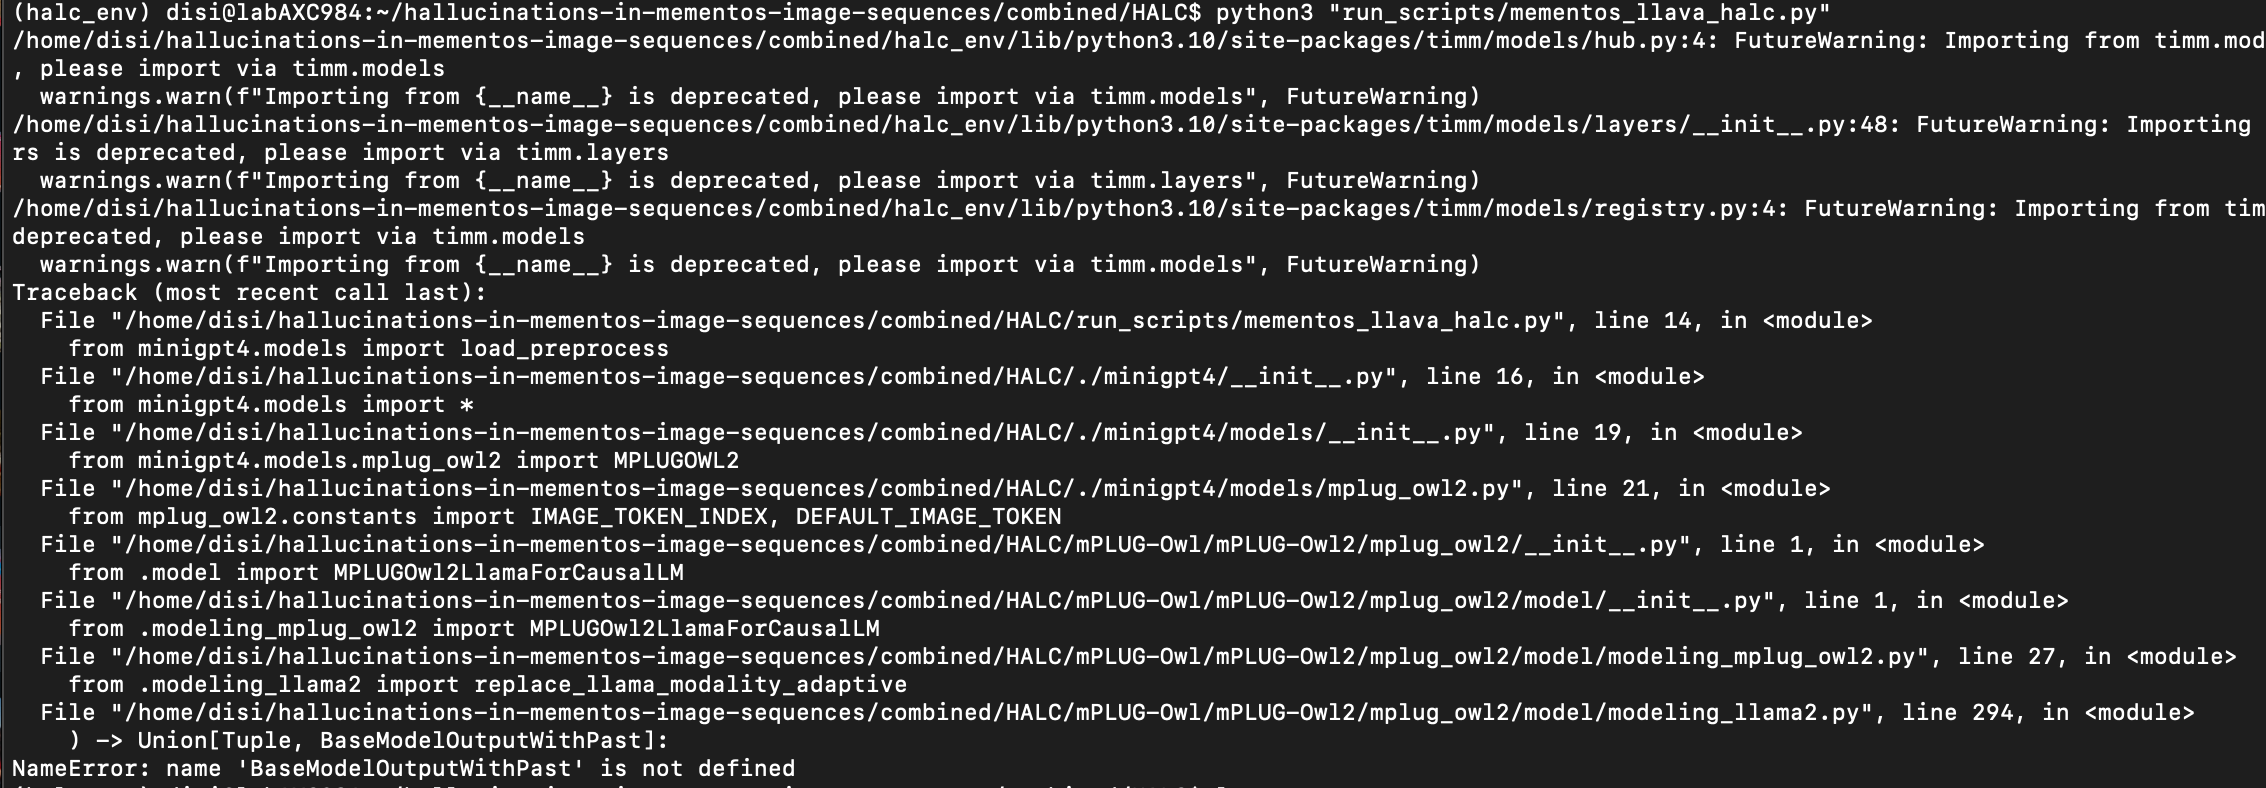

add this:
```
from transformers.modeling_outputs import (
    BaseModelOutputWithPast,
    CausalLMOutputWithPast,
    QuestionAnsweringModelOutput,
    SequenceClassifierOutputWithPast,
    TokenClassifierOutput,
)
```

in `combined/HALC/mPLUG-Owl/mPLUG-Owl2/mplug_owl2/model/modeling_llama2.py` file:

### Generating the descriptions applying HALC

In [ ]:
# run it once, because I want to save it in my drive
IMAGES_DESCRIPTION_PATH = "/content/drive/MyDrive/Colab Notebooks/Grounded Language Processing [146078]/Projects/images_description/"
%mkdir "$IMAGES_DESCRIPTION_PATH"
%mkdir "$IMAGES_DESCRIPTION_PATH""llava_halc/"
%cd "/content/HALC/"

/content/HALC


In [ ]:
new_halc_code_path = "/content/HALC/run_scripts/mementos_llava_halc.py"
FINAL_DESCRIPTION_PATH = IMAGES_DESCRIPTION_PATH + "llava_halc"
prompt = "Write a description for the given image sequence in a single paragraph, what is happening in this episode?"
modify_halc_code(dataset_name="llava_halc", input_prompt=prompt, \
                 img_files=all_halc_img_files, img_dict=all_halc_img_dict, \
                #  img_files=halc_img_files, img_dict=halc_img_dict, \
                 new_halc_code_path=new_halc_code_path, image_description_path=FINAL_DESCRIPTION_PATH)

In [ ]:
!python "run_scripts/mementos_llava_halc.py"

/usr/local/lib/python3.11/dist-packages/timm/models/hub.py:4: FutureWarning: Importing from timm.models.hub is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)
2025-02-05 01:35:02.297468: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738719302.342698    9432 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738719302.356849    9432 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-05 01:35:02.406392: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical ope

### Generating the descriptions applying HALC with incorrect prompt

In [ ]:
!pip install openpyxl -q

In [ ]:
import pandas as pd

# INCORRECT_OBJECT_PATH = "" # replace it with your path
# INCORRECT_OBJECT_PATH = "/content/drive/MyDrive/Anotações/Codes Google Colab/incorrect_object_action_list.xlsx"
INCORRECT_OBJECT_PATH = "/content/drive/MyDrive/Colab Notebooks/Grounded Language Processing [146078]/Projects/incorrect_object_action_list.xlsx"

def create_incorrect_prompt(img_files):
  # we also add option to provide opportunity for individual prompting (every file has its own prompt)
  img_prompts = {}
  df = pd.read_excel(INCORRECT_OBJECT_PATH)
  for key, filename in img_files.items():
    # Extracting the incorrect objects for that example and creating the prompt

    incorrect_objects = df.loc[df["image_name"] == filename, "hallucinated_object_list"].values[0]

    prompt = f"""User: Please create a list of the objects you see in these images.
LVLM: {incorrect_objects}
User: Write a description for the given image sequence in a single paragraph, what is happening in this episode?
LVLM:"""
    img_prompts[key] = prompt

  return img_prompts

In [ ]:
halc_img_prompts = create_incorrect_prompt(halc_img_files)

In [ ]:
halc_img_prompts["MMT-0"]

'User: Please create a list of the objects you see in these images.\nLVLM: [tree, artist, clock, book, kite, bird, train]\nUser: Write a description for the given image sequence in a single paragraph, what is happening in this episode?\nLVLM:'

In [ ]:
# run it once, because I want to save it in my drive
IMAGES_DESCRIPTION_PATH = "/content/drive/MyDrive/Colab Notebooks/Grounded Language Processing [146078]/Projects/images_description/"
%mkdir "$IMAGES_DESCRIPTION_PATH"
%mkdir "$IMAGES_DESCRIPTION_PATH""llava_halc_incorrect_prompt/"
%cd "/content/HALC/"

In [ ]:
new_halc_code_path = "/content/HALC/run_scripts/mementos_llava_halc_incorrect_prompt.py"
FINAL_DESCRIPTION_PATH = IMAGES_DESCRIPTION_PATH + "llava_halc_incorrect_prompt"
modify_halc_code(dataset_name="llava_halc_incorrect_prompt", img_files=halc_img_files, \
                 img_dict=halc_img_dict, img_prompts=halc_img_prompts, \
                 new_halc_code_path=new_halc_code_path, image_description_path=FINAL_DESCRIPTION_PATH)

In [ ]:
!python "run_scripts/mementos_llava_halc_incorrect_prompt.py"

/usr/local/lib/python3.11/dist-packages/timm/models/hub.py:4: FutureWarning: Importing from timm.models.hub is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)
2025-02-05 01:20:35.994418: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738718436.057493    4572 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738718436.070598    4572 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-05 01:20:36.105799: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical ope

#Memento's evaluation


In [ ]:
%cd "/content/"
!git clone https://github.com/umd-huang-lab/Mementos.git

/content
Cloning into 'Mementos'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 56 (delta 23), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (56/56), 144.09 KiB | 6.26 MiB/s, done.
Resolving deltas: 100% (23/23), done.


##Fixing the GPT-4 assisted evaluation file

Since the file is a jupyter notebook, we have to load and change it as JSON

###Errors:
**1)** *UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 16877-16878: invalid continuation byte*

The function

```
df = pd.read_csv(filename, encoding='latin-1')
```
could not read utf-8 encoding. The `latin-1` was added<br><br>

**2)** APIRemovedInV1:

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface.

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742<br><br>


In [ ]:
import os

os.makedirs('/content/dl_eval/', exist_ok=True)
os.makedirs('/content/dl_eval/llava_halc', exist_ok=True)
os.makedirs('/content/dl_eval/llava_halc_incorrect_prompt', exist_ok=True)
os.makedirs('/content/results/', exist_ok=True)

PATH_IMAGES_DESCRIPTION = '/content/images_description/'

Creating a template evaluation code

In [ ]:
import json

file_path = "/content/Mementos/GPT-4-assisted_evaluation.ipynb"
new_file_path = "/content/Mementos/template_evalution.ipynb"

with open(file_path, "r") as f:
    notebook_data = json.load(f)

# Iterate through the cells
for cell in notebook_data['cells']:
    # Only modify code cells
    if cell['cell_type'] == 'code':

        # Importing the necessary requirements
        if "class ActionGraph:\n" in cell['source']:
            requirements = [
                "import pickle\n",
                "import os\n",
                "import pandas as pd\n",
                "import numpy as np\n",
                "from openai import OpenAI\n",
            ]

            cell['source'] = requirements + cell['source']

        # Commenting the old api key method
        if "openai.api_key = ' ' # your key" in cell['source']:
            cell['source'] = ["# openai.api_key = ' ' # your key"]

        # Fixing dl_description.csv path and setting the encoding to latin-1
        # Sorting the dataframe
        if "filename = 'dl_description.csv'\n" in cell['source']:
            cell['source'] = [
                "filename = '/content/Mementos/dl_description.csv'\n",
                "df = pd.read_csv(filename, encoding='latin-1')\n",
                "df.sort_values(by='image_name', inplace=True)"
            ]

        # Changing the open ai code according to the new modifications
        # Setting the open ai key
        if "            response = openai.ChatCompletion.create(\n" in cell['source']:
            start_index = cell['source'].index("            response = openai.ChatCompletion.create(\n")
            end_index = cell['source'].index("            with open('dl_eval/{}.txt'.format(base_name), 'w') as file:\n")

            cell['source'][start_index:end_index] = [
                f"            client = OpenAI(api_key='{userdata.get('openai')}')\n",
                "            response = client.chat.completions.create(\n",
                "                    model=\"gpt-4-1106-preview\",  # or \n",
                "                    messages=messages,\n",
                "                    temperature=0,\n",
                "                    max_tokens=1000\n",
                "                )\n",
                "            res = response.choices[0].message.content\n"
            ]

        # during expanding the prediction list using synonym graph, the Mementos code using splitting with (": ").
        # However, not all of the text generated can be splitted in this way. In this part, we fix this part
        found_bug_splitting = "            key, value = item.split(': ')\n"
        if found_bug_splitting in cell['source']:
          start_index = cell['source'].index(found_bug_splitting)
          end_index = start_index + 1
          cell["source"][start_index:end_index] = ["            parts = item.split(': ')\n", "            if len(parts) == 2:\n", "              key, value = parts\n", "            else:\n", "              continue\n"]

        # Changing the path for the action and object graph
        if "action_graph = load_graph('dl_action_graph_v1.pkl')" in cell['source']:
            cell['source'] = ["action_graph = load_graph('/content/Mementos/sym_graphs/dl_action_graph_v1.pkl')"]
        if "object_graph = load_graph('dl_object_graph_v1.pkl')" in cell['source']:
            cell['source'] = ["object_graph = load_graph('/content/Mementos/sym_graphs/dl_object_graph_v1.pkl')"]


        # Writing the metrics results output in a txt file
        if "np.mean(np.array(a_re)), np.mean(np.array(a_pre)), np.mean(np.array(a_f1))" in cell['source']:

            cell['source'] = [
                f"with open('set your path', 'a') as f:\n",
                "    f.write(f'Action Recall: {np.mean(np.array(a_re))}\\n')\n",
                "    f.write(f'Action Precision: {np.mean(np.array(a_pre))}\\n')\n",
                "    f.write(f'Action F1: {np.mean(np.array(a_f1))}\\n\\n')\n"
            ]

        if "np.mean(np.array(o_re)), np.mean(np.array(o_pre)), np.mean(np.array(o_f1))" in cell['source']:

            cell['source'] = [
                f"with open('set your path', 'a') as f:\n",
                "    f.write(f'Object Recall: {np.mean(np.array(o_re))}\\n')\n",
                "    f.write(f'Object Precision: {np.mean(np.array(o_pre))}\\n')\n",
                "    f.write(f'Object F1: {np.mean(np.array(o_f1))}')\n"
            ]


        # Comment this part if you want to run evaluation in the whole dataset.
        # Set the stopping number in which the evaluation will stop.
        if "for image, gt_des in zip(df['image_name'], df['description']):\n" in cell['source']:
            start_index = cell['source'].index("for image, gt_des in zip(df['image_name'], df['description']):\n")
            end_index = cell['source'].index("    base_name = image[:-4]\n")
            stop_evaluation = 3

            cell['source'][start_index:end_index] = [
                "for idx, (image, gt_des) in enumerate(zip(df['image_name'], df['description'])):\n",
                f"    stop_evaluation = {stop_evaluation}\n",
                f"    if idx == stop_evaluation:\n",
                "        break\n"
            ]

with open(new_file_path, "w", encoding="utf-8") as file:
    json.dump(notebook_data, file, indent=1)


##LLaVa with HALC evaluation

In [ ]:
LLAVA_HALC_DESCRIPTION_PATH = PATH_IMAGES_DESCRIPTION + 'llava_halc'
LLAVA_HALC_EVAL_RESULTS = '/content/results/llava_halc_eval_results.txt'

file_path = "/content/Mementos/template_evalution.ipynb"
new_file_path = "/content/llava_halc_evalution.ipynb"

with open(file_path, "r") as f:
    notebook_data = json.load(f)

# Iterate through the cells
for cell in notebook_data['cells']:
    # Only modify code cells
    if cell['cell_type'] == 'code':

        # Setting the correct paths
        if "    gpt_des_pth = '' # your AI-generated txt file path\n" in cell['source']:
            index = cell['source'].index("    gpt_des_pth = '' # your AI-generated txt file path\n")

            cell['source'][index] = f"    gpt_des_pth = f'{LLAVA_HALC_DESCRIPTION_PATH}/{{base_name}}.txt' # your AI-generated txt file path\n"

        if "with open('set your path', 'a') as f:\n" in cell['source']:
            index = cell['source'].index("with open('set your path', 'a') as f:\n")

            cell['source'][index] = f"with open('{LLAVA_HALC_EVAL_RESULTS}', 'a') as f:\n"

        # Fixing path for the folder dl_eval
        if "    pth = 'dl_eval/{}.txt'.format(base_name)\n" in cell['source']:
            index = cell['source'].index("    pth = 'dl_eval/{}.txt'.format(base_name)\n")

            cell['source'][index] = "    pth = '/content/dl_eval/llava_halc/{}.txt'.format(base_name)\n"

        if "            with open('dl_eval/{}.txt'.format(base_name), 'w') as file:\n" in cell['source']:
            index = cell['source'].index("            with open('dl_eval/{}.txt'.format(base_name), 'w') as file:\n")

            cell['source'][index] = "            with open('/content/dl_eval/llava_halc/{}.txt'.format(base_name), 'w') as file:\n"


        if "        if not os.path.exists('dl_eval/{}.txt'.format(base_name)): # set your keywords list file pth\n" in cell['source']:
            index = cell['source'].index("        if not os.path.exists('dl_eval/{}.txt'.format(base_name)): # set your keywords list file pth\n")

            cell['source'][index] = "        if not os.path.exists('/content/dl_eval/llava_halc/{}.txt'.format(base_name)): # set your keywords list file pth\n"

with open(new_file_path, "w", encoding="utf-8") as file:
    json.dump(notebook_data, file, indent=1)


In [ ]:
!jupyter nbconvert --to notebook --execute --inplace "/content/llava_halc_evalution.ipynb"

[NbConvertApp] Converting notebook /content/llava_halc_evalution.ipynb to notebook
[NbConvertApp] Writing 22805 bytes to /content/llava_halc_evalution.ipynb


##LLaVa with HALC and incorrect prompt evaluation

In [ ]:
LLAVA_HALC_INCORRECT_PROMPT_DESCRIPTION_PATH = PATH_IMAGES_DESCRIPTION + 'llava_halc_incorrect_prompt'
LLAVA_HALC_INCORRECT_PROMPT_EVAL_RESULTS = '/content/results/llava_halc_incorrect_prompt_eval_results.txt'

file_path = "/content/Mementos/template_evalution.ipynb"
new_file_path = "/content/llava_halc_incorrect_prompt_evalution.ipynb"

with open(file_path, "r") as f:
    notebook_data = json.load(f)

# Iterate through the cells
for cell in notebook_data['cells']:
    # Only modify code cells
    if cell['cell_type'] == 'code':

        # Setting the correct paths
        if "    gpt_des_pth = '' # your AI-generated txt file path\n" in cell['source']:
            index = cell['source'].index("    gpt_des_pth = '' # your AI-generated txt file path\n")

            cell['source'][index] = f"    gpt_des_pth = f'{LLAVA_HALC_INCORRECT_PROMPT_DESCRIPTION_PATH}/{{base_name}}.txt' # your AI-generated txt file path\n"

        if "with open('set your path', 'a') as f:\n" in cell['source']:
            index = cell['source'].index("with open('set your path', 'a') as f:\n")

            cell['source'][index] = f"with open('{LLAVA_HALC_INCORRECT_PROMPT_EVAL_RESULTS}', 'a') as f:\n"

        # Fixing path for the folder dl_eval
        if "    pth = 'dl_eval/{}.txt'.format(base_name)\n" in cell['source']:
            index = cell['source'].index("    pth = 'dl_eval/{}.txt'.format(base_name)\n")

            cell['source'][index] = "    pth = '/content/dl_eval/llava_halc_incorrect_prompt/{}.txt'.format(base_name)\n"

        if "            with open('dl_eval/{}.txt'.format(base_name), 'w') as file:\n" in cell['source']:
            index = cell['source'].index("            with open('dl_eval/{}.txt'.format(base_name), 'w') as file:\n")

            cell['source'][index] = "            with open('/content/dl_eval/llava_halc_incorrect_prompt/{}.txt'.format(base_name), 'w') as file:\n"


        if "        if not os.path.exists('dl_eval/{}.txt'.format(base_name)): # set your keywords list file pth\n" in cell['source']:
            index = cell['source'].index("        if not os.path.exists('dl_eval/{}.txt'.format(base_name)): # set your keywords list file pth\n")

            cell['source'][index] = "        if not os.path.exists('/content/dl_eval/llava_halc_incorrect_prompt/{}.txt'.format(base_name)): # set your keywords list file pth\n"

with open(new_file_path, "w", encoding="utf-8") as file:
    json.dump(notebook_data, file, indent=1)


In [ ]:
!jupyter nbconvert --to notebook --execute --inplace "/content/llava_halc_incorrect_prompt_evalution.ipynb"

[NbConvertApp] Converting notebook /content/llava_halc_incorrect_prompt_evalution.ipynb to notebook
[NbConvertApp] Writing 22924 bytes to /content/llava_halc_incorrect_prompt_evalution.ipynb
